In [4]:
import warnings
warnings.filterwarnings("ignore")
import logging
logging.basicConfig(level=logging.ERROR)
import pandas as pd

sunspots_data=pd.read_csv('D:\\_NILESH\\dissertation\\data\\cleaned\\sunspots.csv')

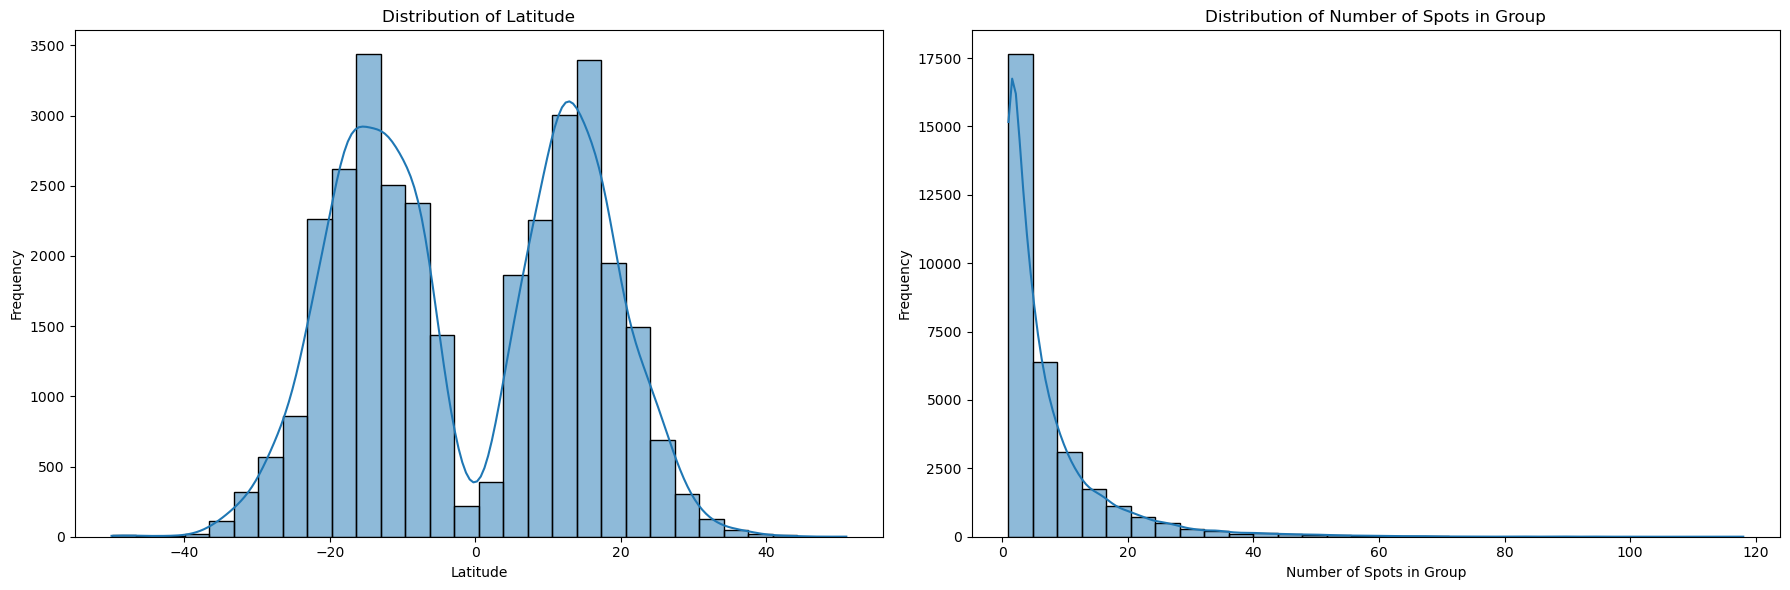

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Load the cleaned dataset again
cleaned_data = sunspots_data

# Plotting histograms for Latitude and Number of Spots in Group

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Latitude
sns.histplot(cleaned_data['latitude'], kde=True, ax=axes[0], bins=30)
axes[0].set_title('Distribution of Latitude')
axes[0].set_xlabel('Latitude')
axes[0].set_ylabel('Frequency')

# Number of Spots in Group
sns.histplot(cleaned_data['number_of_spots_in_group'], kde=True, ax=axes[1], bins=30)
axes[1].set_title('Distribution of Number of Spots in Group')
axes[1].set_xlabel('Number of Spots in Group')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('image/sunspot_data_distribution.png')
plt.show()

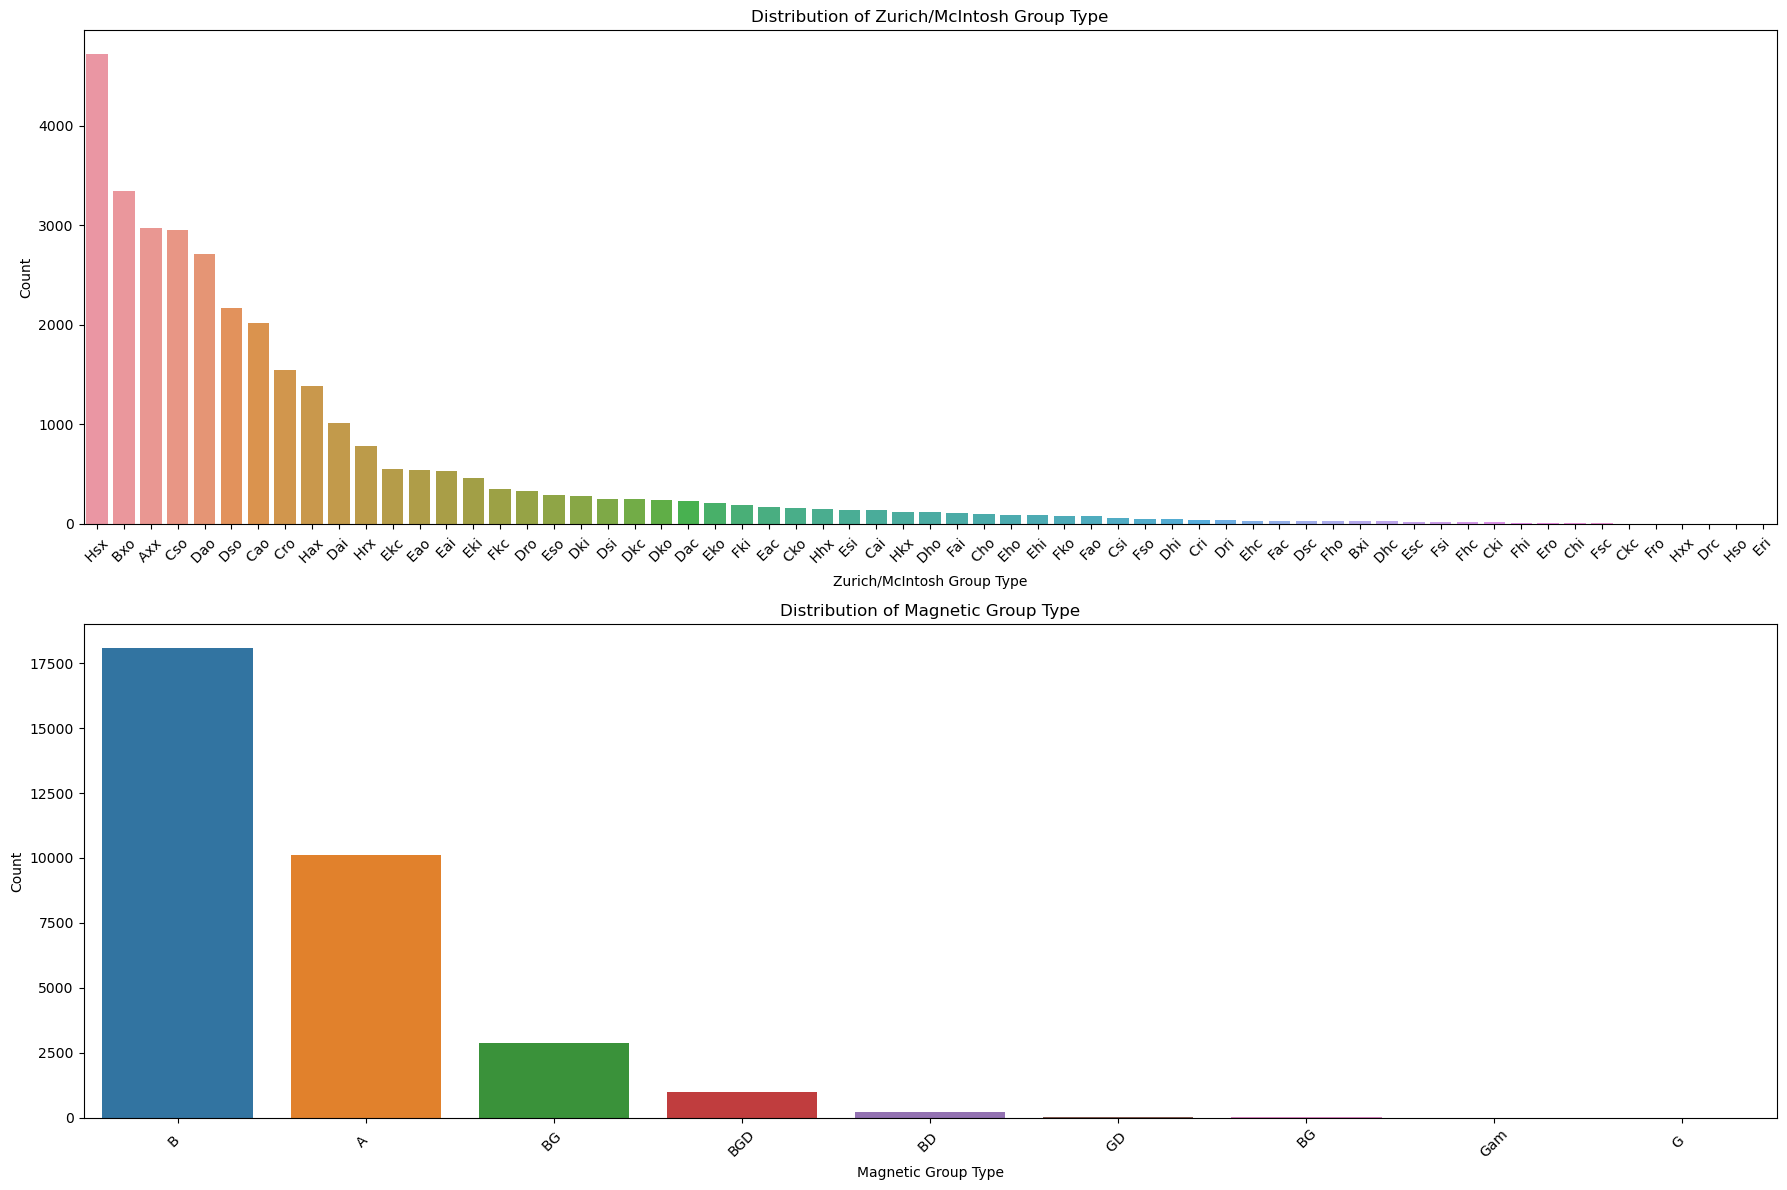

In [8]:
# 3. Categorical Analysis

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))

# Zurich/McIntosh Group Type
sns.countplot(data=cleaned_data, x='zurich/mcintosh_group_type', ax=axes[0], order=cleaned_data['zurich/mcintosh_group_type'].value_counts().index)
axes[0].set_title('Distribution of Zurich/McIntosh Group Type')
axes[0].set_xlabel('Zurich/McIntosh Group Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Magnetic Group Type
sns.countplot(data=cleaned_data, x='magnetic_group_type', ax=axes[1], order=cleaned_data['magnetic_group_type'].value_counts().index)
axes[1].set_title('Distribution of Magnetic Group Type')
axes[1].set_xlabel('Magnetic Group Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('image/sunspot_data_distribution_bar.png')
plt.show()


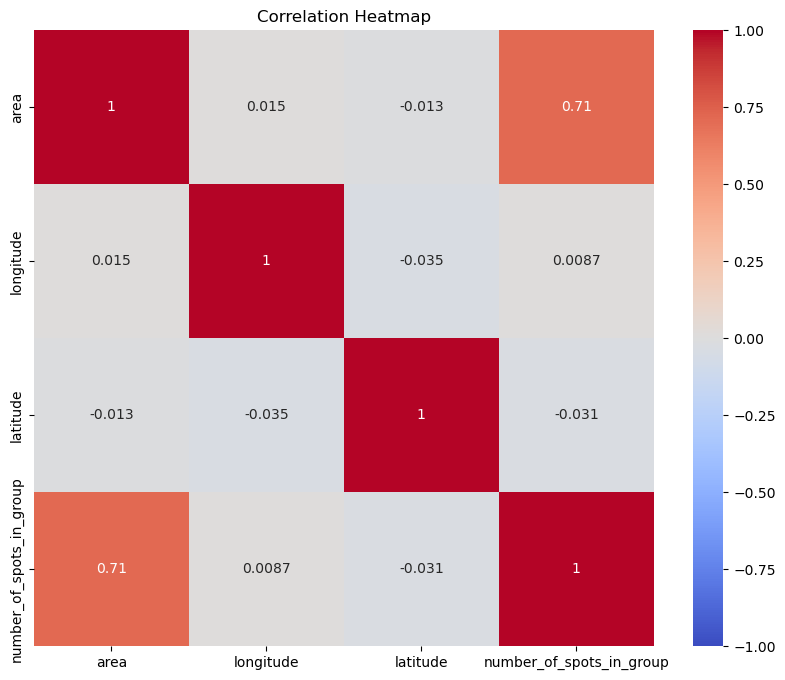

In [10]:
# 4. Correlation Analysis

# Calculating correlations among numerical variables
correlation_matrix = cleaned_data[['area', 'longitude', 'latitude', 'number_of_spots_in_group']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.savefig('image/sunspot_data_distribution_corr.png')
plt.show()


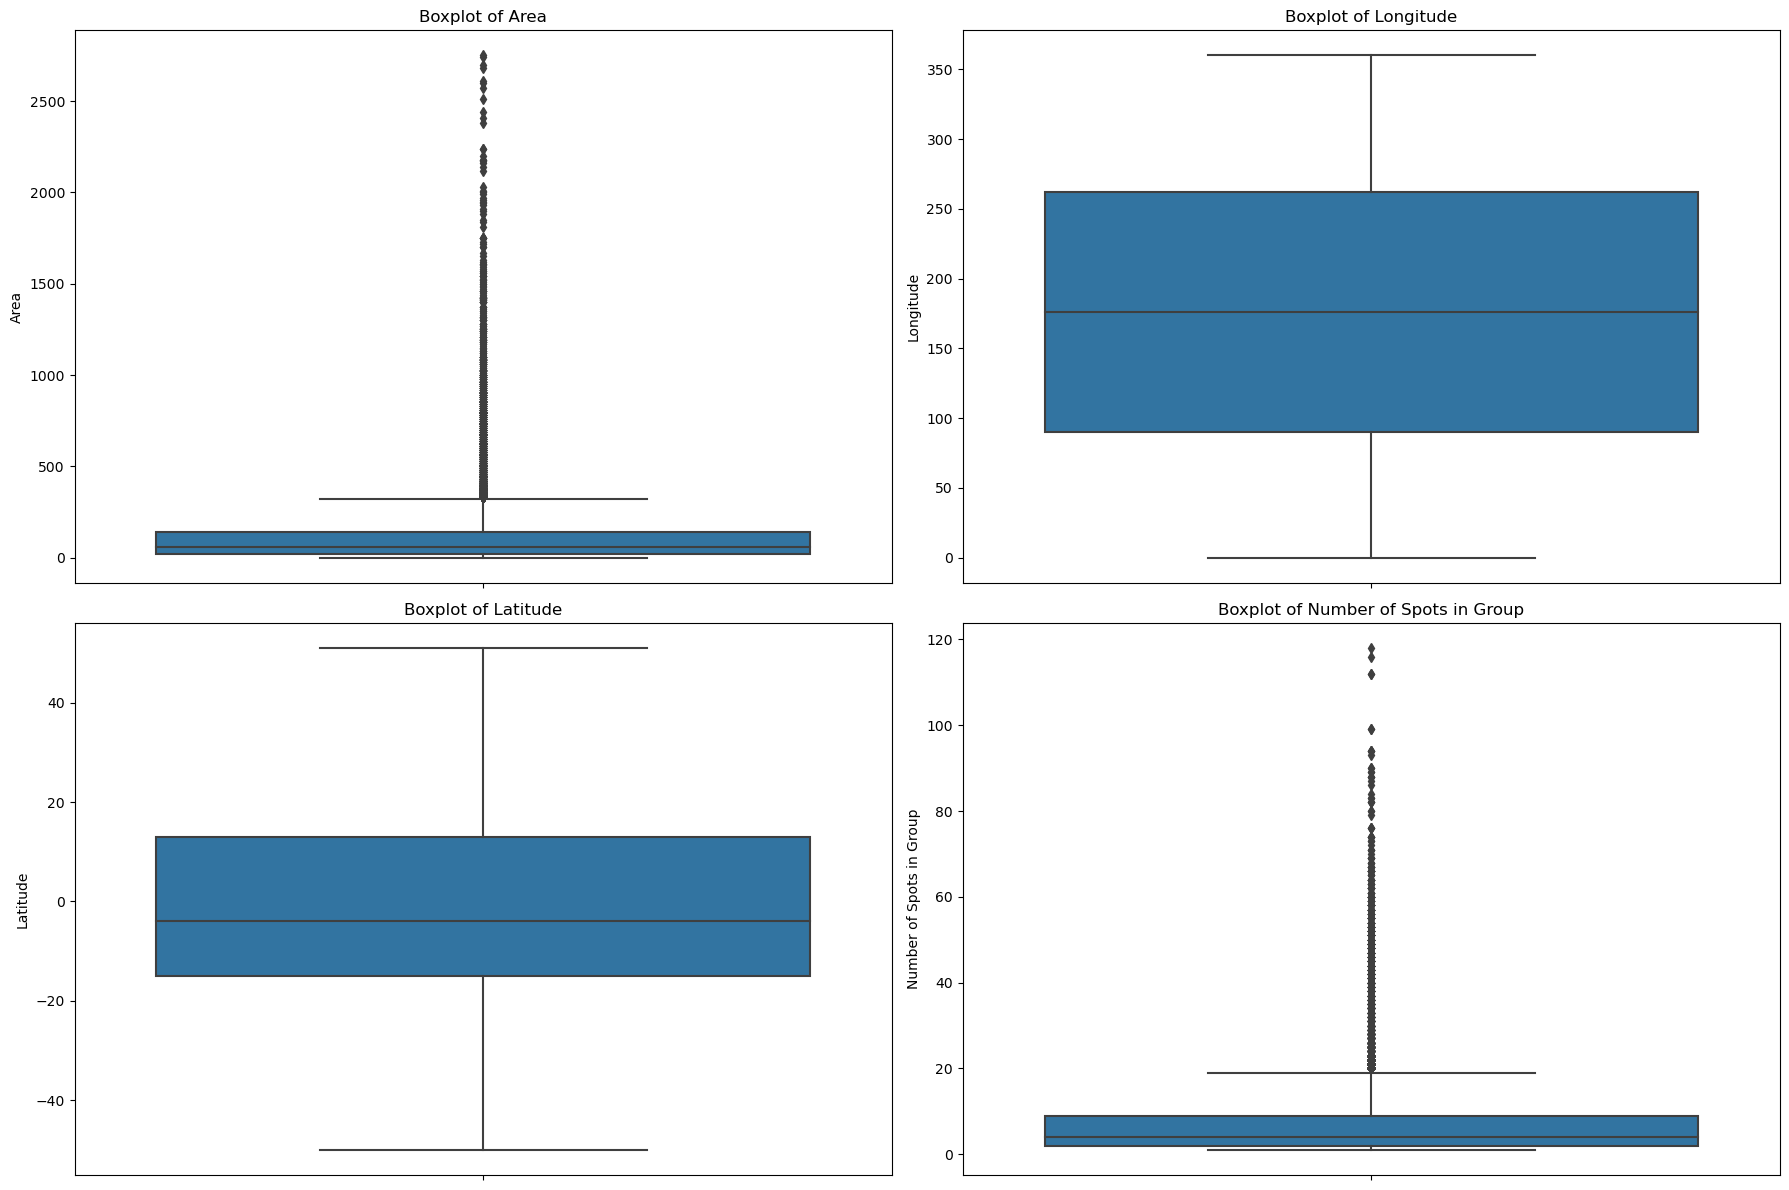

In [11]:
# 5. Outlier Analysis

# Setting up subplots for the four key numerical variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Boxplots for each variable

# Area
sns.boxplot(y=cleaned_data['area'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Area')
axes[0, 0].set_ylabel('Area')

# Longitude
sns.boxplot(y=cleaned_data['longitude'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Longitude')
axes[0, 1].set_ylabel('Longitude')

# Latitude
sns.boxplot(y=cleaned_data['latitude'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Latitude')
axes[1, 0].set_ylabel('Latitude')

# Number of Spots in Group
sns.boxplot(y=cleaned_data['number_of_spots_in_group'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Number of Spots in Group')
axes[1, 1].set_ylabel('Number of Spots in Group')

plt.tight_layout()
plt.savefig('image/sunspot_data_distribution_box.png')
plt.show()


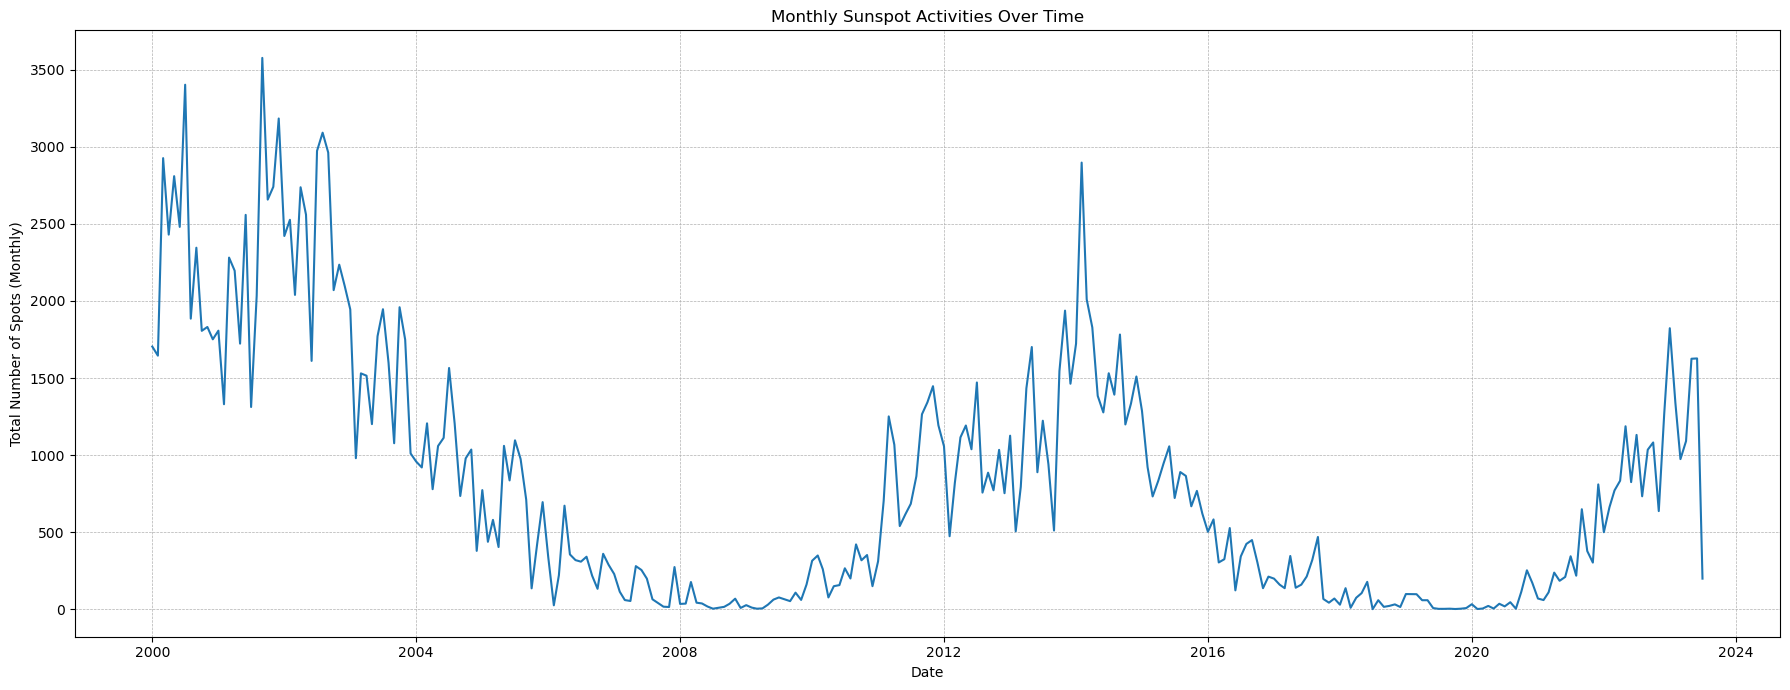

In [12]:
# Converting the 'date' column to datetime format
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'])

# Grouping by month and summing the number of spots to get total spots for each month
temporal_data_monthly = cleaned_data.groupby(cleaned_data['date'].dt.to_period('M')).sum()['number_of_spots_in_group'].reset_index()
temporal_data_monthly['date'] = temporal_data_monthly['date'].dt.to_timestamp()

# Plotting the monthly trend to identify any cyclic patterns
plt.figure(figsize=(18, 7))
sns.lineplot(data=temporal_data_monthly, x='date', y='number_of_spots_in_group')
plt.title('Monthly Sunspot Activities Over Time')
plt.xlabel('Date')
plt.ylabel('Total Number of Spots (Monthly)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('image/sunspot_data_distribution_sunspot_activity.png')
plt.show()
